# Lista 1

### Zaimplementowane biblioteki

In [1]:
import random
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

### Zadanie 1

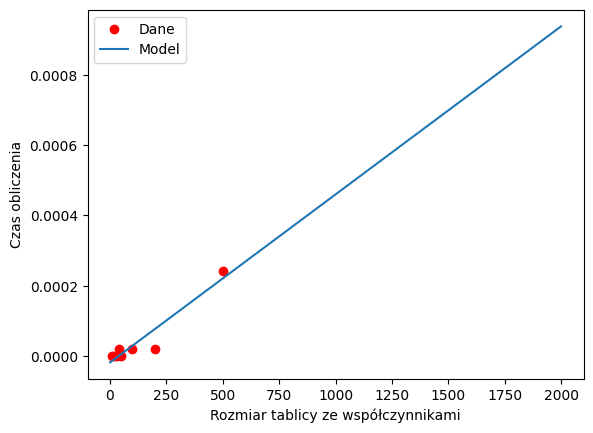

In [5]:
def value_nsquared(given_x):

    n = random.randint(1, 10)                          #losowanie rozmiaru tablicy ze wspolczynnikami
    a = [random.randint(1,50) for i in range(0, n)]    #losowanie wartości wspolczynnikow
    result = 0

    for i in range(0, n):
        a_i = a[i]
        x_i = 1

        for j in range(0, i):
            x_i = x_i * given_x
        
        result += x_i * a_i
    
    return a, result

def value_nlogn(given_x):

    n = random.randint(1, 10)                          #losowanie rozmiaru tablicy ze wspolczynnikami
    a = [random.randint(1,50) for i in range(0, n)]    #losowanie wartości wspolczynnikow
    result = 0

    for i in range(0, n):
        a_i = a[i]
        result += a_i * (given_x**i)
    
    return a, result

def horner(given_x, n):

    a = [random.randint(1,50) for i in range(0, n+1)]    #losowanie wartości wspolczynnikow
    bracket_val = a[n]

    start = time.time()
    for i in range(n, 0, -1):
        bracket_val = (given_x * bracket_val) + a[i-1]
    end = time.time()
    
    return end-start


###################################

times = [[horner(5, i) for i in (10, 20, 30, 40, 50, 100, 200, 500, 1000)] for j in range(50)]
x_label = [10, 20, 30, 40, 50, 100, 200, 500, 1000]


mean = []
for i in range(9):
    summation = 0
    for j in range(50):
        summation += times[j][i]
    mean.append(summation/len(times))


#hipoteza
def func(x,a,b):
    return a*x + b

popt, pcov = curve_fit(func, x_label, mean)
a, b = popt[0], popt[1]
x2_label = np.arange(1, 2000)

plt.scatter(x_label, mean, c='r', label='Dane')
plt.plot(x2_label, func(x2_label, a, b), label = 'Model')
plt.xlabel('Rozmiar tablicy ze współczynnikami')
plt.ylabel('Czas obliczenia')
plt.legend()
plt.show()

#z powyzszych wynikow otrzymujemy potwierdzenie hipotezy, zakladajacej, ze zlozonosc algorytmu Hornera to O(n)

### Zadanie 2

Rozmiar tablicy: 10
Rozmiar tablicy: 20
Rozmiar tablicy: 30
Rozmiar tablicy: 40
Rozmiar tablicy: 50
Rozmiar tablicy: 100
Rozmiar tablicy: 200
Rozmiar tablicy: 500


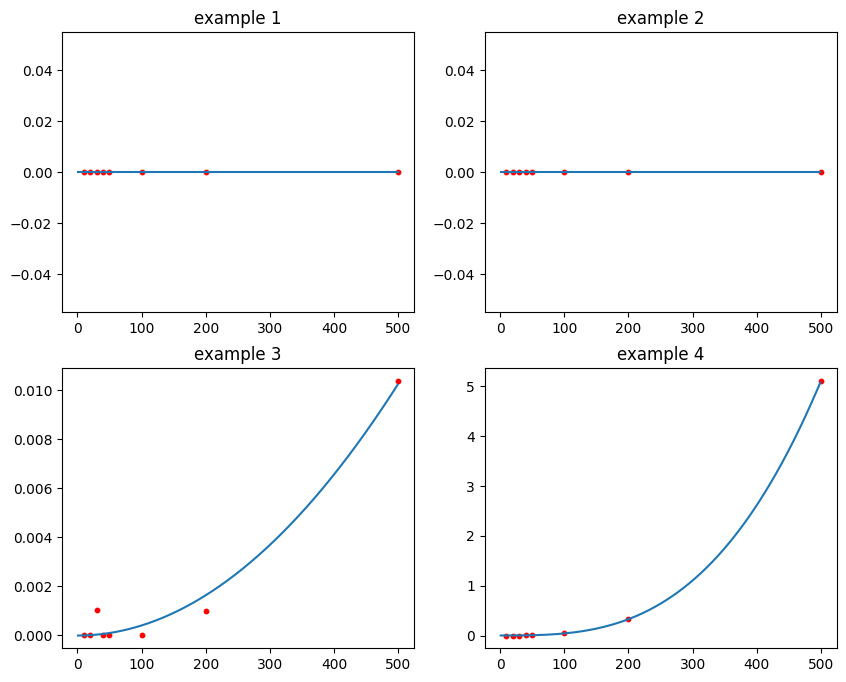

In [7]:
def example1(S):
    """Return the sum of the elements in sequence S."""
    n = len(S)
    total = 0
    for j in range(n):
       total += S[j]
    return total


def example2(S):
    """Return the sum of the elements with even index in sequence S."""
    n = len(S)
    total = 0
    for j in range(0, n, 2):
       total += S[j]
    return total


def example3(S):
    """Return the sum of the prex sums of sequence S."""
    n = len(S)
    total = 0
    for j in range(n):
       for k in range(1+j):
           total += S[k]
    return total


def example4(A, B): # assume that A and B have equal length
    """Return the number of elements in B equal to the sum of prex sums in A."""
    n = len(A)
    1
    count = 0
    for i in range(n):
        total = 0
        for j in range(n):
            for k in range(1+j):
                total += A[k]
        if B[i] == total:
            count += 1
    return count

example1_time, example2_time, example3_time, example4_time = [], [], [], []
sizes = [10, 20, 30, 40, 50, 100, 200, 500]


for i in sizes:
    example_list = [random.randint(-20, 20) for j in range(i)]
    example_additional_list = [random.randint(-20, 20) for j in range(i)]

    start = time.time()
    example1(example_list)
    stop = time.time()
    example1_time.append(stop-start)

    start = time.time()
    example2(example_list)
    stop = time.time()
    example2_time.append(stop-start)

    start = time.time()
    example3(example_list)
    stop = time.time()
    example3_time.append(stop-start)

    start = time.time()
    example4(example_list, example_additional_list)
    stop = time.time()
    example4_time.append(stop-start)

    print(f'Rozmiar tablicy: {i}')


#hipotheses
from scipy.optimize import curve_fit

def func_1_2(x, a, b):  return a*x + b
def func_3(x, a, b):  return a*(x**2) + b
def func_4(x, a, b):  return a*(x**3) + b

popt_1, pcov_1 = curve_fit(func_1_2, sizes, example1_time)
popt_2, pcov_2 = curve_fit(func_1_2, sizes, example2_time)
popt_3, pcov_3 = curve_fit(func_3, sizes, example3_time)
popt_4, pcov_4 = curve_fit(func_4, sizes, example4_time)

xs = np.arange(1,500)

fig, ax = plt.subplots(2, 2, figsize=(10,8))

ax[0,0].scatter(sizes, example1_time, s=10, c='r')
ax[0,0].plot(xs, func_1_2(xs, popt_1[0], popt_1[1]))
ax[0,1].scatter(sizes, example2_time, s=10, c='r')
ax[0,1].plot(xs, func_1_2(xs, popt_2[0], popt_2[1]))
ax[1,0].scatter(sizes, example3_time, s=10, c='r')
ax[1,0].plot(xs, func_3(xs, popt_3[0], popt_3[1]))
ax[1,1].scatter(sizes, example4_time, s=10, c='r')
ax[1,1].plot(xs, func_4(xs, popt_4[0], popt_4[1]))

ax[0,0].set_title("example 1")
ax[0,1].set_title("example 2")
ax[1,0].set_title("example 3")
ax[1,1].set_title("example 4")
plt.show()


#Analiza pokazala, ze
#example1 i example2 sa zlozonosci O(n)
#example3 jest zlozonosci O(n^2)
#example4 jest zlozonosci O(n^3)

### Zadanie 3

50


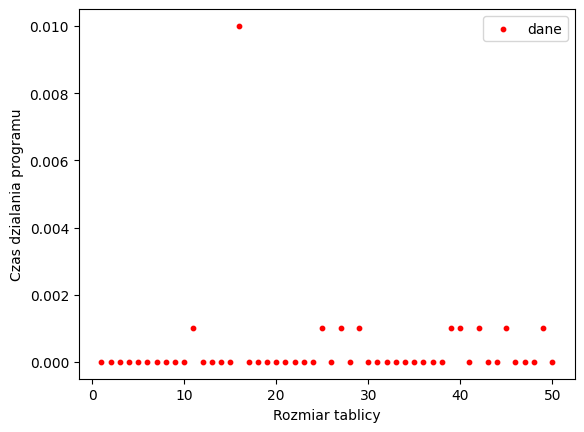

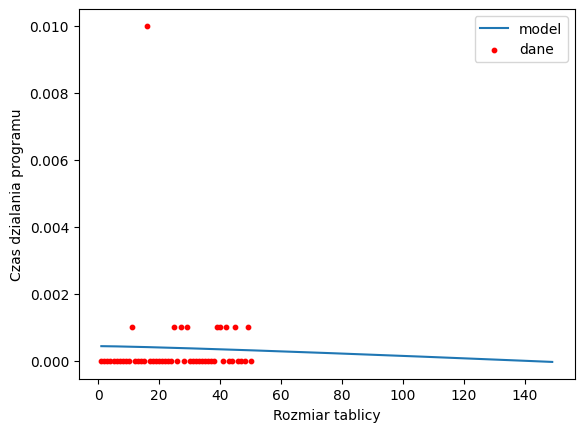

In [8]:
sizes = [i for i in range(1,51)]
times = [[0]*50 for i in range(50)]
print(len(times))

for i in range(50):
    for n, j in enumerate(sizes):
        random_array = [random.randint(-20,20) for m in range(j)]

        start = time.time()
        sorted(random_array)
        stop = time.time()

        times[i][n] = stop-start

mean = []
for i in range(50):
    summation = 0
    for j in range(50):
        summation += times[j][i]
    mean.append(summation)

    


plt.scatter(sizes, mean, c='r', s=10, label='dane')
plt.xlabel('Rozmiar tablicy')
plt.ylabel('Czas dzialania programu')
plt.legend()
plt.show()


#hipoteza
def func(x, a, b):  return a*x*np.log(x) + b
popt, pcov = curve_fit(func, sizes, mean)

a, b = popt
x = np.arange(1, 150)

plt.plot(x, func(x, a, b), label='model')
plt.scatter(sizes, mean, c='r', s=10, label='dane')
plt.xlabel('Rozmiar tablicy')
plt.ylabel('Czas dzialania programu')
plt.legend()
plt.show()
#z analizy wynika, że funkcja sorted jest złożoności nlogn